## Vorobyov_Sergey_Hw2_AGT 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
INF = 2**10

In [2]:
data = pd.read_csv("globalterrorismdb_0718dist.csv")
data.head()

,eventid,iyear,related
0,197000000001,1970,NaN
1,197000000002,1970,NaN
2,197001000001,1970,NaN
3,197001000002,1970,NaN
4,197001000003,1970,NaN


In [3]:
year_2007 = data.loc[data['iyear'] == 2007]
year_2008 = data.loc[data['iyear'] == 2008]

In [4]:
year_2007 = year_2007.drop(['iyear'], axis = 1)
year_2008 = year_2008.drop(['iyear'], axis = 1)

In [37]:
def dfs(graph, start):
    visited, stack = set(), [start]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(graph[vertex] - visited)
    return visited

def eccentricity_metrics(G):
    n = random.randint(0, INF)
    arr = np.zeros(n)
    listed = list(nx.all_pairs_shortest_path_length(G))
    count = 0
    answer = list()
    for i in range(len(listed)):
        tmp = 0
        if type(listed[i][1]) is dict:
            if i in arr:
                arr[0] = i
            else:
                arr[0] = count
            for j in listed[i][1].values():
                if j > tmp:
                    tmp = j
        answer.append([listed[i][0], tmp])
    return answer

def Floyd_Uorshell(A):
    for z in range(len(A)):
        for i in range(len(A)):
            for j in range(len(A)):
                A[i][j] = min(A[i][j], A[i][z] + A[z][j])
                
def matching_with_size(connected, number):
    listed_edges = list(connected.edges)
    size = len(listed_edges)
    if number == 0:
        return 1
    
    if size < number:
        return 0
    
    changed_connected = connected.copy()
    u,v = listed_edges[0]
    changed_connected.remove_edge(u,v)
    connected.remove_nodes_from(list(listed_edges[0]))
    return matching_with_size(changed_connected, number) + matching_with_size(connected, number - 1)


def bfs(start, end, graph):
    todo = [(start, [start])]
    while len(todo):
        node, path = todo.pop(0)
        for next_node in graph[node]:
            if next_node in path:
                continue
            elif next_node == end:
                yield path + [next_node]
            else:
                todo.append((next_node, path + [next_node]))
                
def ker_distance(n1, n2):
    result = (n1-n2)/(n1+n2) * 100
    if abs(result) < 10:
        print("graphs are look alike")
    else:
        print("graphs are NOT look alike")
        

def dependencies(number_x1, number_x2):
    function = None
    for i in number_x1:
        disjunctions = None
        for j in range(len(i)):
            if i[j] == 1:
                disjunctions = Or(disjunctions, exprvar(('x' + str(number_x2[j]))))
        if function == None:
            function = disjunctions
        else:
            function = And(function, disjunctions)
    return function

def kernel_view(G, number_i = 100):
    number = nx.convert_matrix.to_numpy_array(G)
    np.fill_diagonal(number, 1)
    list_tmp = np.zeros(number_i)
    function = dependencies(number, list(G.nodes))
    function = function.to_dnf()
    listed = list()
    t = type(And(map(exprvar, 'ab')))
    for i in function.iter_dfs():
        if type(i) == t:
            flag = None
            for first, second in combinations(i.inputs, 2):
                if G.has_edge(first[1:], second[1:]):
                    flag = False
            if flag is None:
                flag = True
            if flag == True:
                return i.inputs
    return listed
                                
def wiener_index(A):
    A[A == 0] = INF
    np.fill_diagonal(A, 0)
    Floyd_Uorshell(A)
    return sum(A[A != INF])

def weiner_distance(n1, n2):
    result = (n1-n2)/(n1+n2) * 100
    if abs(result) < 10:
        print("graphs are look alike")
    else:
        print("graphs are NOT look alike")
        

def hosoya_index(G, number = 0):
    bridge = next(nx.algorithms.bridges(G), None)
    if bridge == None:
        number = 0
        k = 1
        listed_nodes = G.nodes
        size = len(listed_nodes)
        n = int(size / 2 + .5)
        for i in range(n):
            number += k * matching_with_size(G.copy(), i)
            k *= -1
        return number
    G_copied = G.copy()
    G_copied.remove_edge(*bridge)
    G.remove_nodes_from(list(bridge))
    return hosoya_index(G_copied) + hosoya_index(G)

def hosoya_distance(n1, n2):
    result = (n1-n2)/(n1+n2) * 100
    if abs(result) < 25:
        print("graphs are look alike")
    else:
        print("graphs are NOT look alike")

def preproc(data):
    graph = nx.Graph()
    for tmp in data.iterrows():
        if not pd.isnull(tmp[1].related):
            nodes = tmp[1].related.replace(' ', '').split(',')
            for i in nodes:
                for j in nodes:
                    if not graph.has_edge(i, j) and i != j:
                        graph.add_edge(i, j, time = 1)
    return graph

def plot_graph(G):
    %matplotlib inline
    fig = plt.figure(figsize=(60, 50))
    ax = fig.add_subplot(1, 1, 1)
    nx.draw(G, ax=ax, with_labels=True)
    
def graph_union(temped_graph, number = 1):
    connected = nx.connected_components(temped_graph)
    list_of_connected = list(connected)
    count = 0
    upper_bound = len(list_of_connected)-1
    while count < number:
        x_1 = random.randint(0, upper_bound)
        x_2 = random.randint(0, upper_bound)
        if x_1 == x_2:
            continue
        x_3 = random.randint(0, len(list_of_connected[x_1])-1)
        x_4 = random.randint(0, len(list_of_connected[x_2])-1)
        if temped_graph.has_edge(x_3, x_4):
            continue
        temped_graph.add_edge(list(list_of_connected[x_1])[x_3], list(list_of_connected[x_2])[x_4])
        count += 1
    return temped_graph

def graph_edit_distance(G, G_prelim, numb=2, number_components = 1):
    temp = number_components
    lowerboundg = random.randint(0, INF)
    iterate = numb
    upperboundg = random.randint(lowerboundg, INF)
    g_p = random.randint(lowerboundg, upperboundg)
    lowerboundl = random.randint(0, INF)
    upperboundl = random.randint(lowerboundl, INF) 
    l_p = random.randint(lowerboundl, upperboundl)
    find_minimum = None
    correct = True
    OPEN = list()
    count = 2**64
    array = np.zeros(numb)
    while(True):
        if iterate == count:
            break
        if g_p <= l_p:
            find_minimum = g_p
        else:
            find_minimum = l_p
        rho_min = find_minimum
        for i in array:
            OPEN.append([rho_min, i])
        if correct:
            return rho_min
        rho_min = random.randint(g_p, l_p)
        if INF < len(G.nodes()):
            for v in G.nodes():
                rho_new = rho_min - random.randint(g_p, l_p)
                OPEN = OPEN.append(rho_new)
                answer = rho_min
    return answer
                
def diameter_metrics(G):
    listed = list(nx.all_pairs_shortest_path_length(G))
    n = random.randint(0, INF)
    arr = np.zeros(n)
    answer = 0
    for i in range(len(listed)):
        if type(listed[i][1]) is dict:
            if i in arr:
                arr[0] = i
            else:
                arr[0] = answer
            for j in listed[i][1].values():
                if j > answer:
                    answer = j
    return answer

def perifery_metrics(eccentricity_result):
    tmp = 0
    empty = list()
    answer_array = empty
    answer_number = tmp
    for i in eccentricity_result:
        if i[1] > tmp:
            tmp = i[1]
            empty = list()
            empty.append(i[0])
        elif i[1] == tmp:
            empty.append(i[0])
    answer_array = empty
    answer_number = tmp
    return answer_number, answer_array


In [6]:
ter = pd.read_csv("globalterrorismdb_0718dist.csv")
ter2007 = ter[ter["iyear"] == 2007]
ter2008 = ter[ter["iyear"] == 2008]
graph_2007 = preproc(ter2007)
graph_2008 = preproc(ter2008)

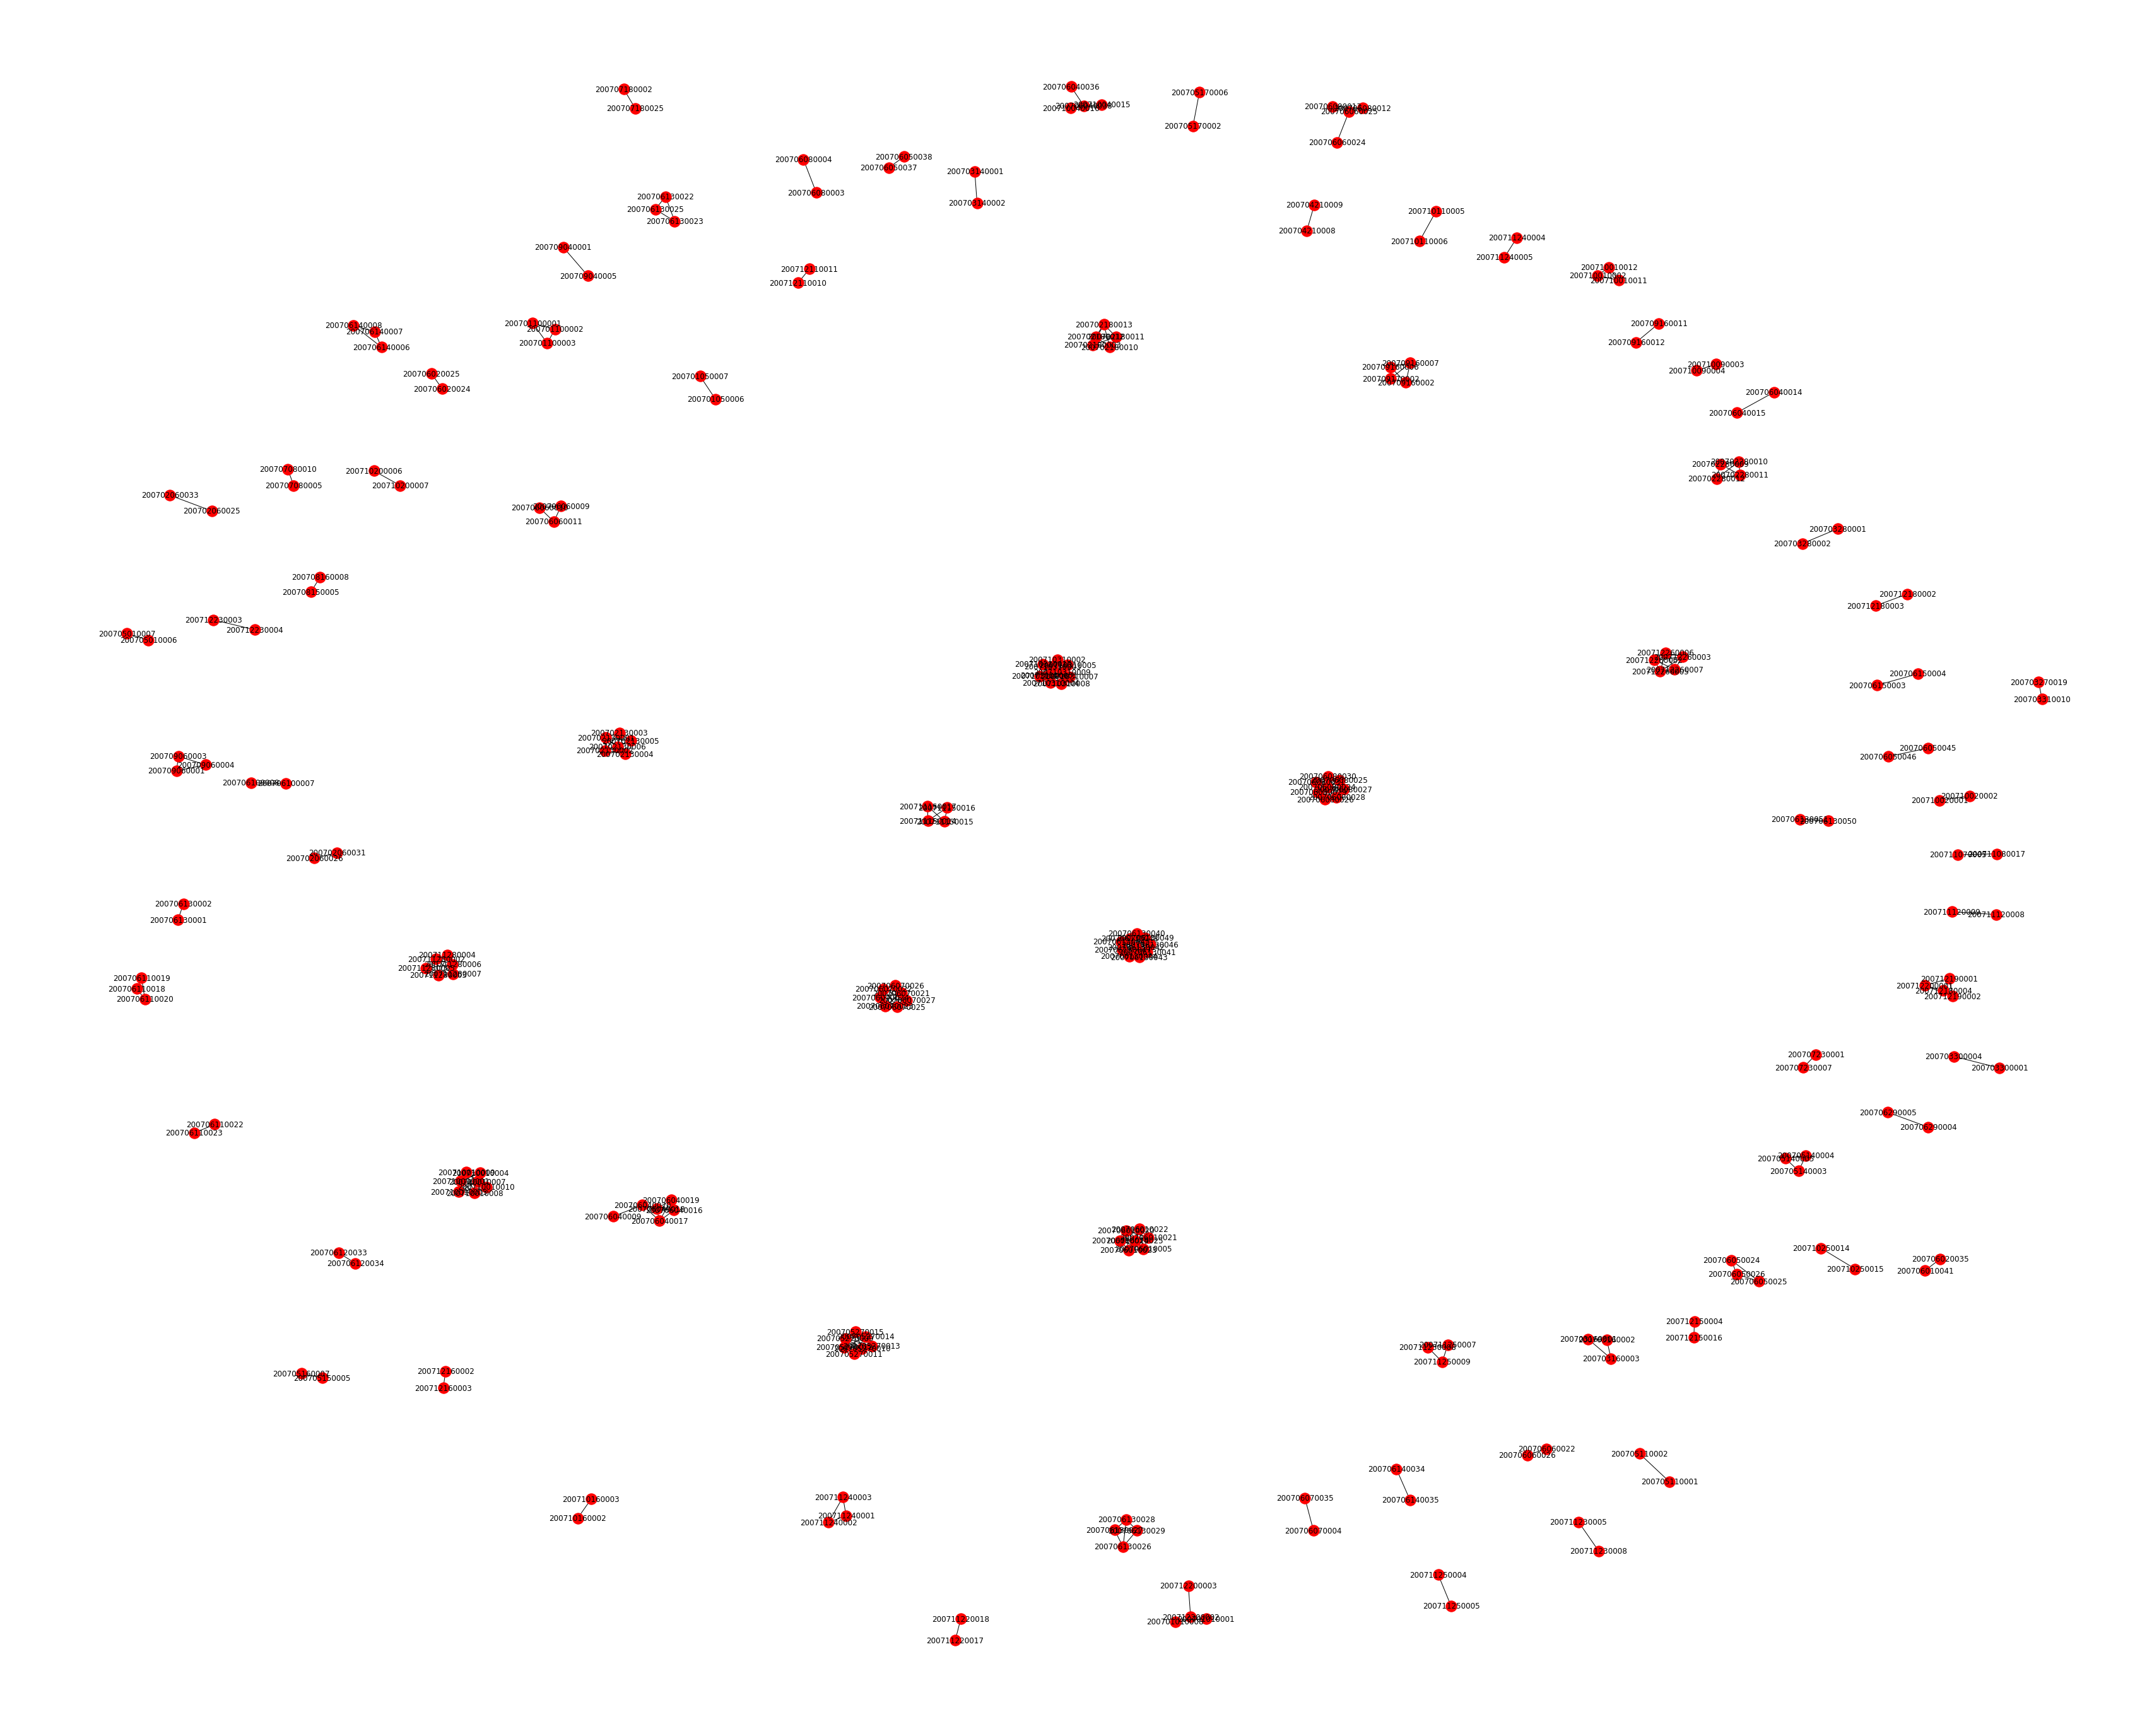

In [7]:
plot_graph(graph_2007)

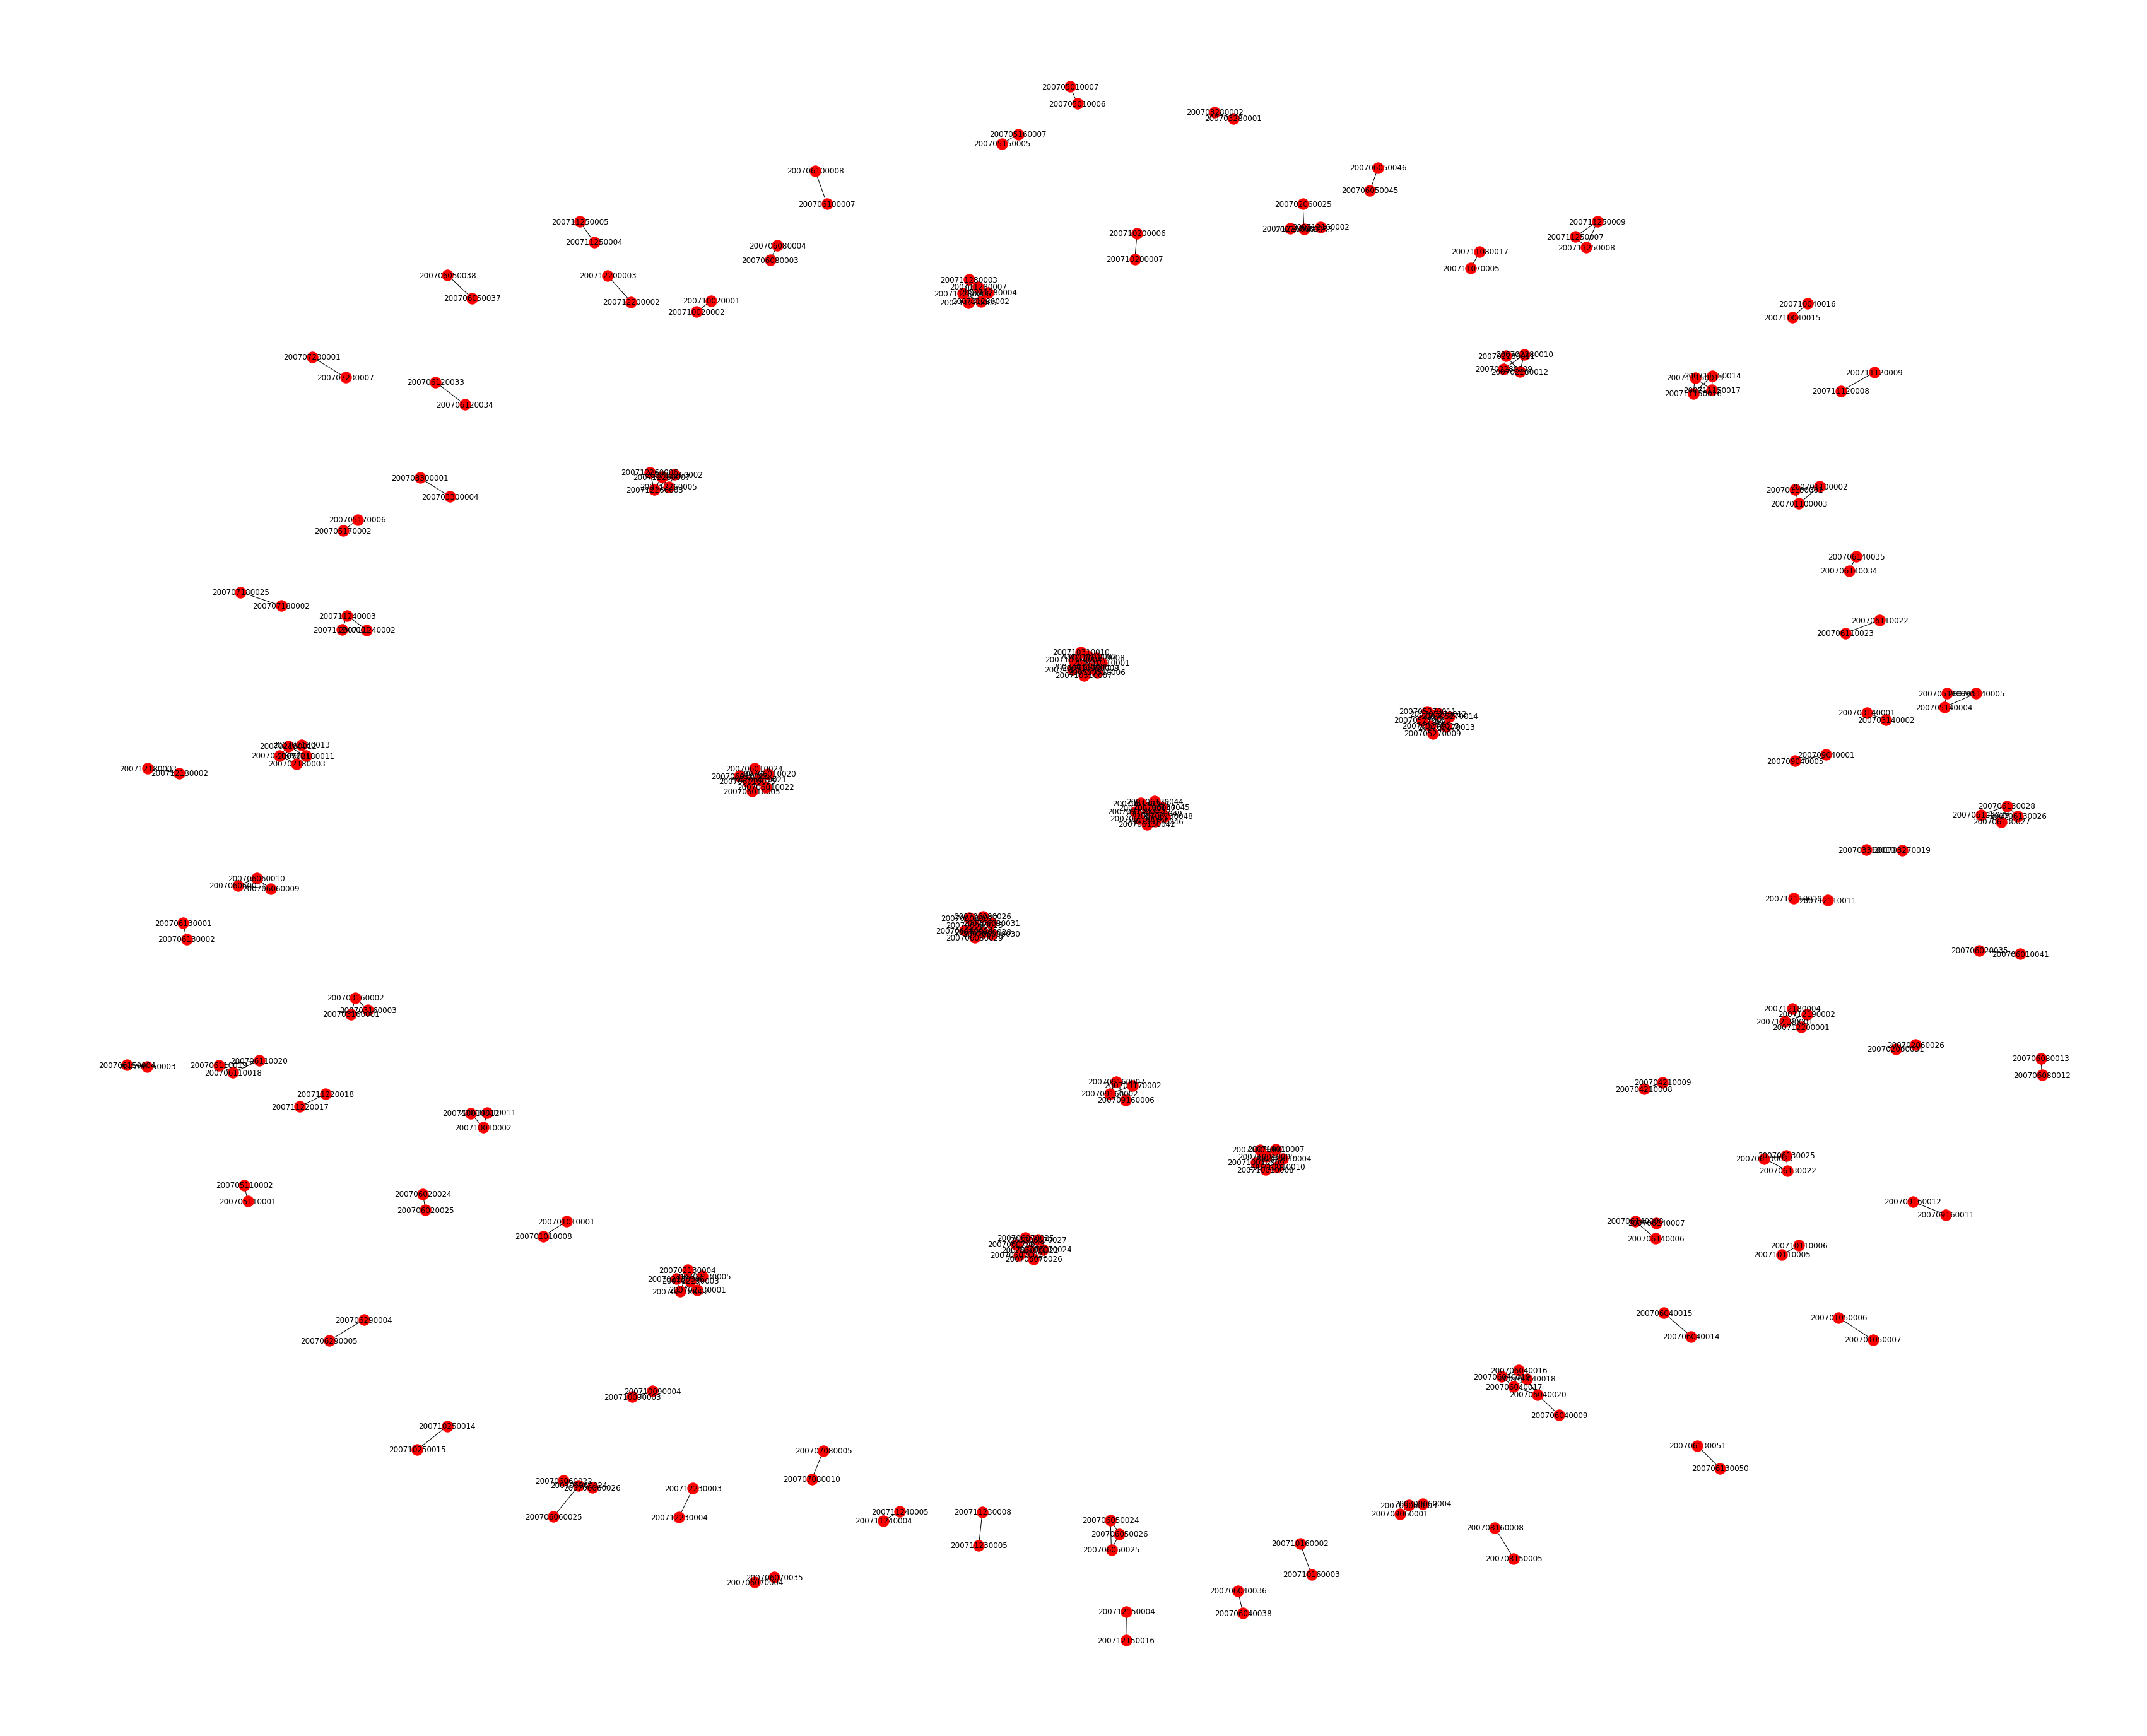

In [8]:
graph_2007.remove_nodes_from(nx.isolates(graph_2007))
graph_2008.remove_nodes_from(nx.isolates(graph_2008))
plot_graph(graph_2007)

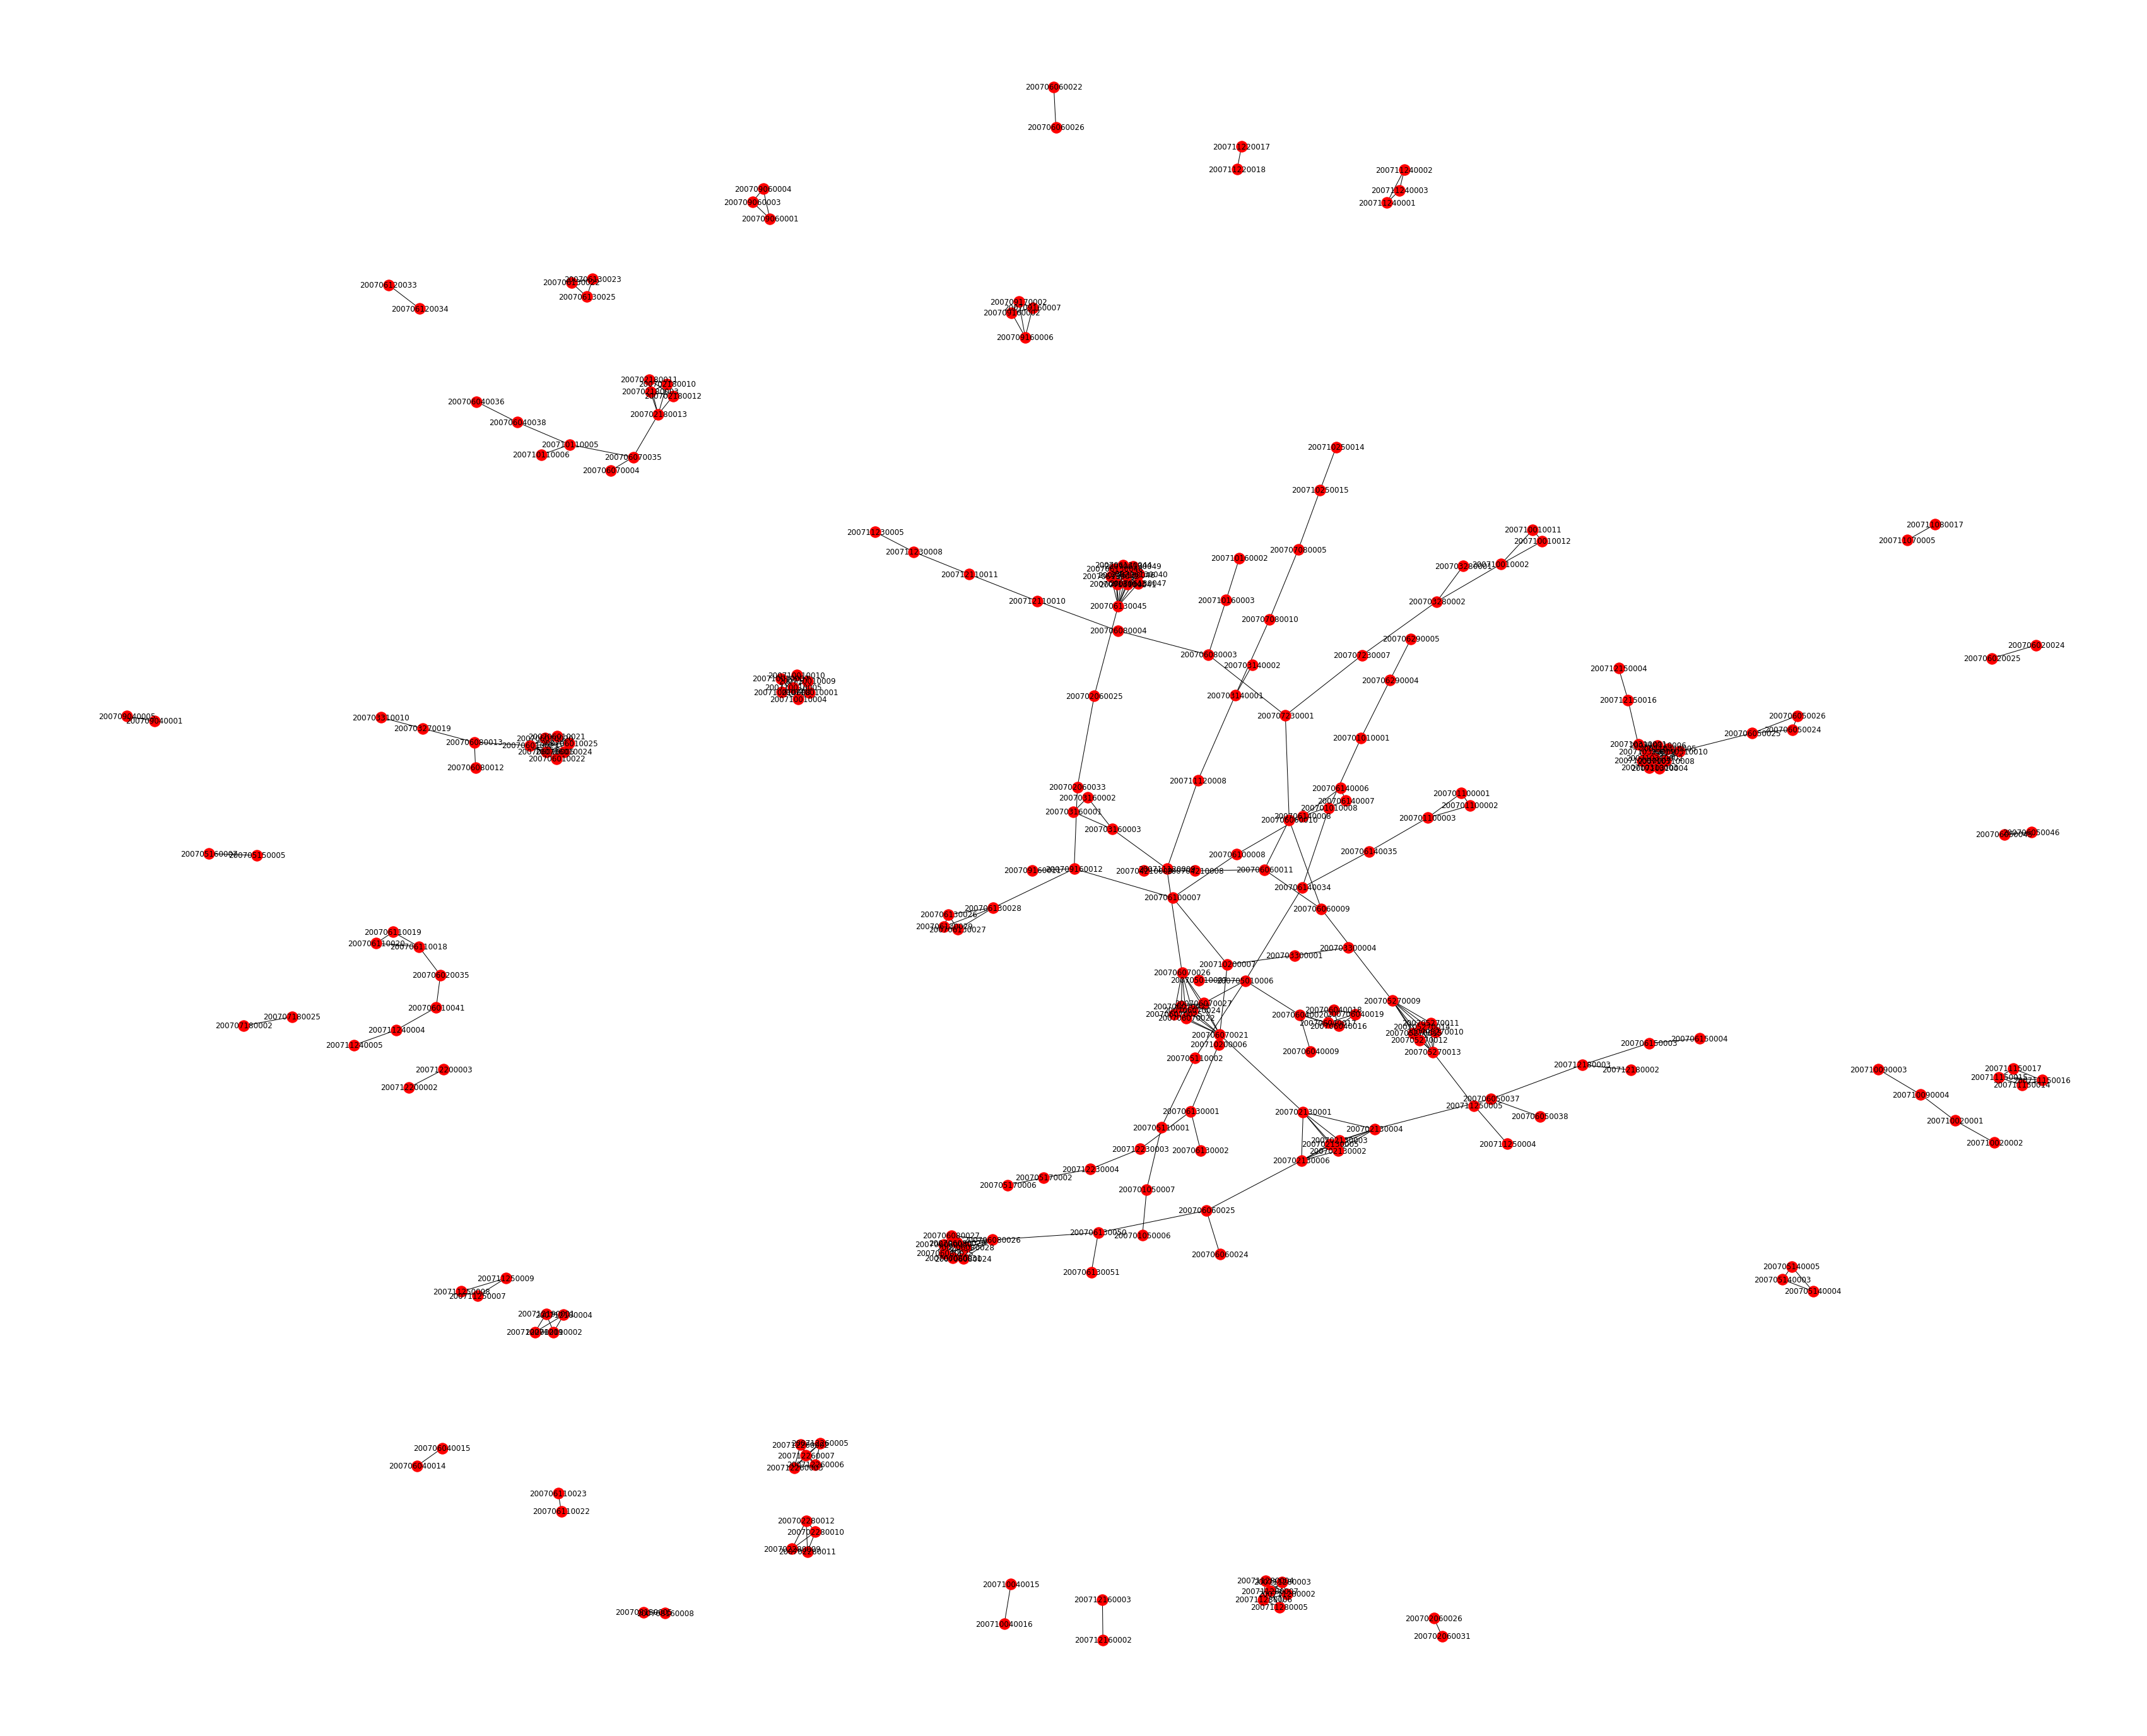

In [9]:
import random
g_first = graph_union(graph_2007.copy(), 51)
g_second = graph_union(graph_2008.copy(), 60)
plot_graph(g_first)

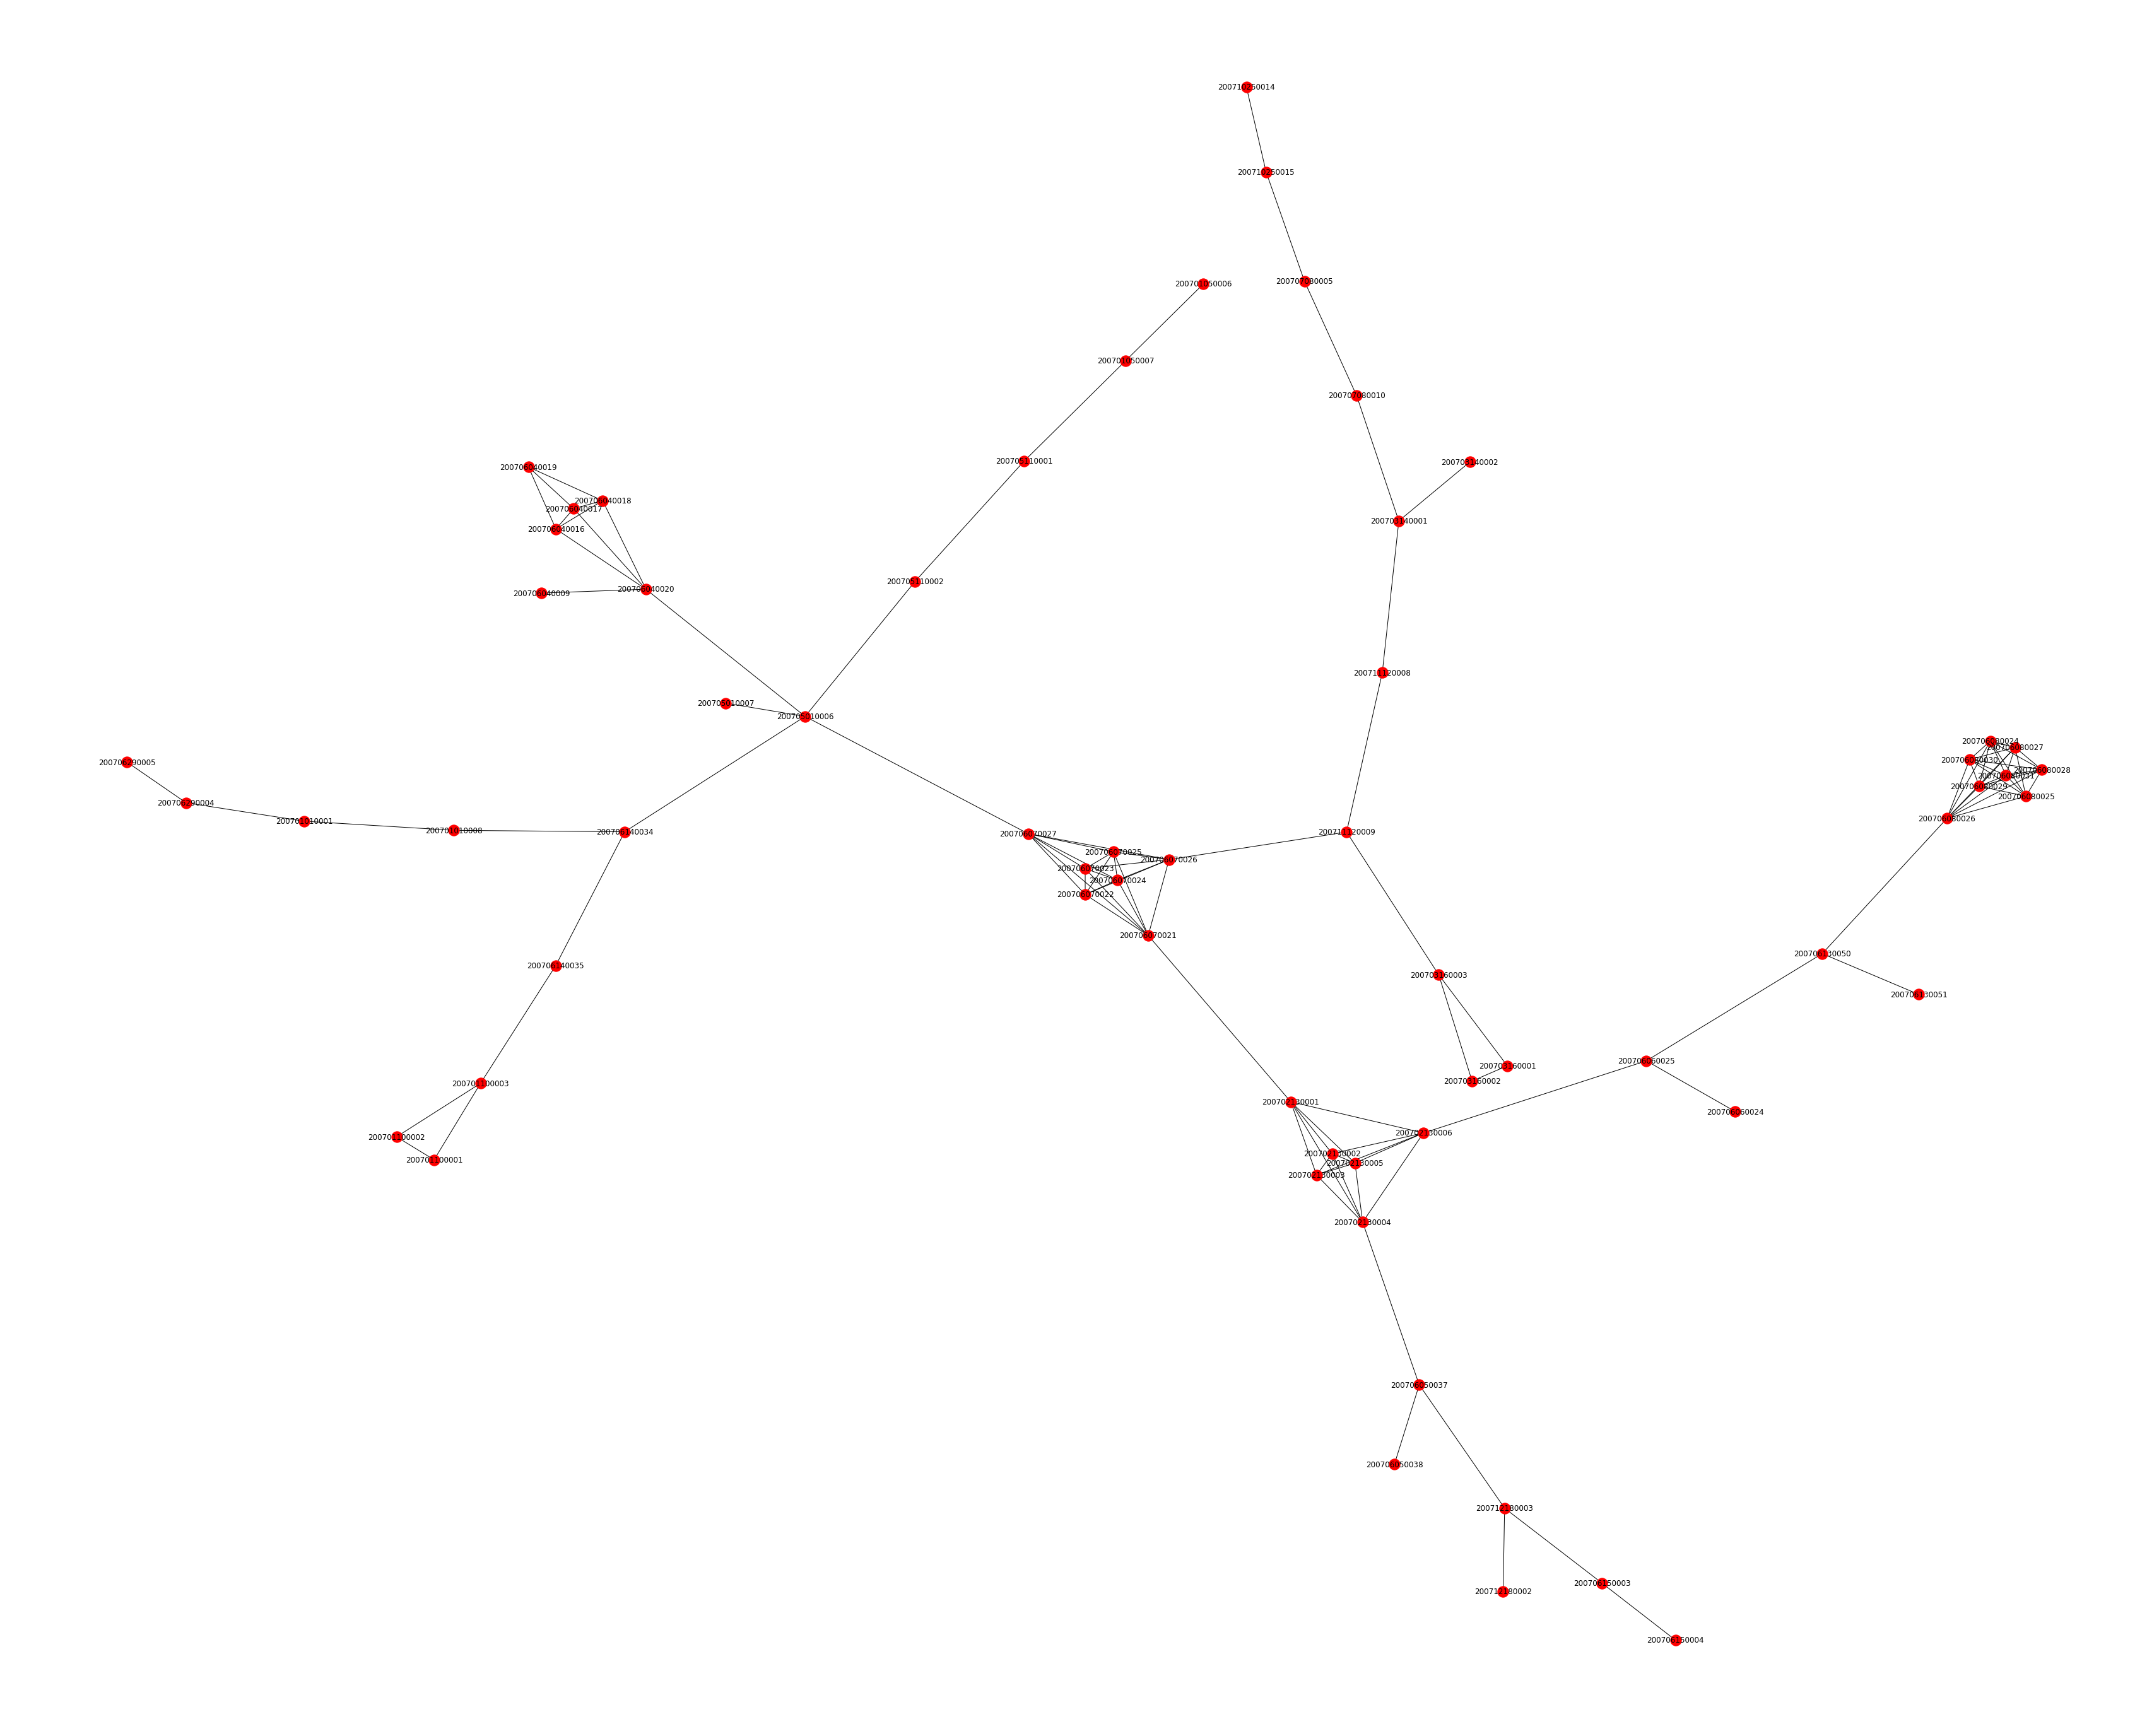

In [10]:
g_first_connected = max(nx.connected_component_subgraphs(g_first), key=len)
g_second_connected = max(nx.connected_component_subgraphs(g_second), key=len)
plot_graph(g_first_connected)

In [11]:
Array1 = nx.convert_matrix.to_numpy_array(g_first_connected)
Array2 = nx.convert_matrix.to_numpy_array(g_second_connected)

### Weiner index 

In [12]:
#Весь функционал, который тут использую прописал выше
g_first_connected_wiener = wiener_index(Array1)
g_first_connected_wiener

25032.0

In [13]:
g_second_connected_wiener = wiener_index(Array2)
g_second_connected_wiener

76766.0

In [15]:
weiner_distance(g_first_connected_wiener, g_second_connected_wiener)

graphs are NOT look alike


В данной метрике, берется отношение разности и суммы двух величин, домноженная на 100, заметим если графы схожы, то она равна 0, если сильно различны, то модулю отношение будет стремится к 1, однако если отношение ниже порога на 0.1 то графы считаются "близкими", и "далекими" иначе.

### Hosoya index

In [15]:
#Весь функционал, который тут использую прописал выше
from time import time

In [18]:
g_first_connected_hosoya = hosoya_index(g_first_connected.copy())

In [31]:
g_second_connected_hosoya = hosoya_index(g_second_connected.copy())

In [32]:
hosoya_distance(g_first_connected_hosoya, g_second_connected_hosoya)

graphs are look alike


В данной метрике, берется отношение разности и суммы двух величин, домноженная на 100, заметим если графы схожы, то она равна 0, если сильно различны, то модулю отношение будет стремится к 1, однако если отношение ниже порога на 0.25 то графы считаются "близкими", и "далекими" иначе.

### Kernel

In [37]:
#Весь функционал, который тут использую прописал выше
from pyeda.inter import *
from itertools import product
from multiprocessing import Pool
g1k = kernel_view(g_first_connected)
g2k = kernel_view(g_second_connected)

In [40]:
ker_distance(len(g1k), len(g2k))

graphs are look alike


Аналогично wiener_distance

### Diameter, Eccentricity, Perifery  

In [16]:
#Весь функционал, который тут использую прописал выше
#Diameter
print(diameter_metrics(g_first_connected))
print(diameter_metrics(g_second_connected))

14
22


In [17]:
#Eccentricity
eg10 = eccentricity_metrics(g_first_connected)
eg20 = eccentricity_metrics(g_second_connected)
print(eccentricity_metrics(g_first_connected))
print(eccentricity_metrics(g_second_connected))

[['200706050038', 12], ['200706040020', 10], ['200706040009', 11], ['200705010006', 9], ['200706150004', 14], ['200706150003', 13], ['200706080029', 14], ['200706080028', 14], ['200703160003', 9], ['200703160002', 10], ['200703160001', 10], ['200706080025', 14], ['200706080024', 14], ['200706080027', 14], ['200706080026', 13], ['200705110002', 10], ['200701100003', 12], ['200705010007', 10], ['200701100001', 13], ['200701010008', 11], ['200707080005', 12], ['200706140035', 11], ['200706140034', 10], ['200705110001', 11], ['200706130050', 12], ['200706130051', 13], ['200706070022', 8], ['200706070023', 8], ['200706070021', 8], ['200706070026', 7], ['200706070027', 8], ['200706070024', 8], ['200706070025', 8], ['200712180003', 12], ['200712180002', 13], ['200711120009', 8], ['200706040018', 11], ['200706040019', 12], ['200701050007', 12], ['200701050006', 13], ['200711120008', 9], ['200706040017', 11], ['200706040016', 11], ['200706060025', 11], ['200706060024', 12], ['200703140001', 10]

In [18]:
#Periphery
print(perifery_metrics(eg10))
print(perifery_metrics(eg20))

(14, ['200706150004', '200706080029', '200706080028', '200706080025', '200706080024', '200706080027', '200710250014', '200706080030', '200706290005', '200706080031'])
(22, ['200807270009', '200808020002', '200808020004', '200808020005', '200808020006', '200808020018', '200808160023', '2008080200018'])


### Edit distance 

In [36]:
#Функционаk реализовал выше
ed = graph_edit_distance(g_first_connected, g_second_connected)
print(ed)

327


Графы имеют схожести, однако говорить о сильном сходстве при таком расстоянии не имеет смысла